In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


Data prepration 

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#remove rows withs missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
# Descriptive statistics
print(df.describe())

print(df['smoker'].value_counts())



               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
no     1064
yes     274
Name: smoker, dtype: int64


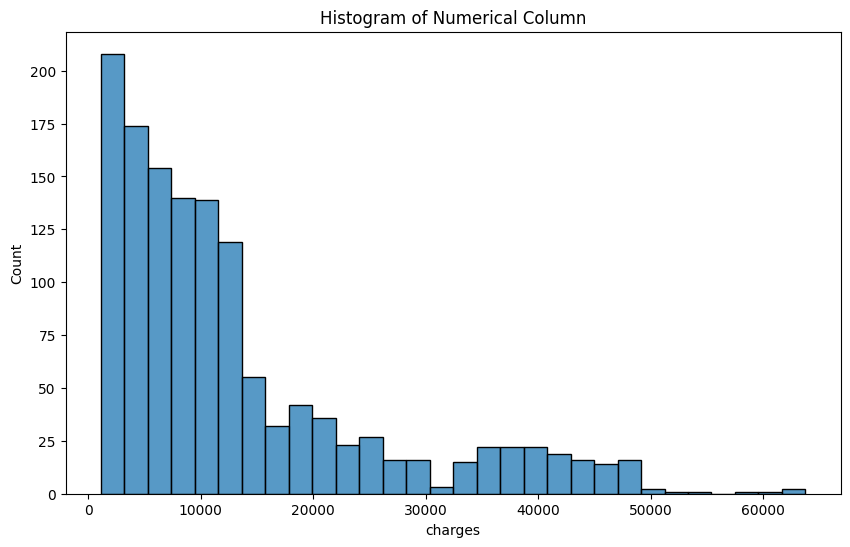

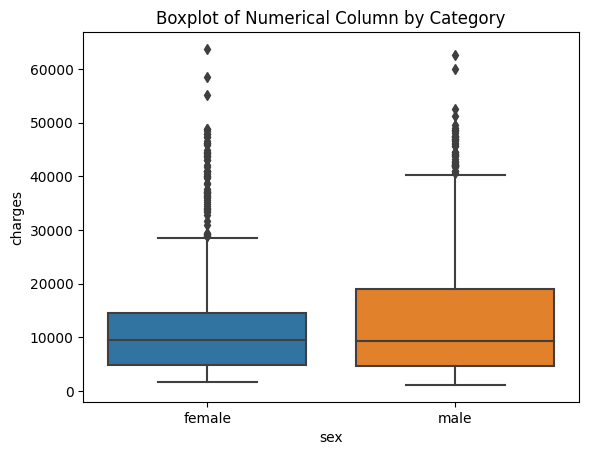

In [7]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges')
plt.title('Histogram of Numerical Column')
plt.show()

sns.boxplot(data=df, x='sex', y='charges')
plt.title('Boxplot of Numerical Column by Category')
plt.show()


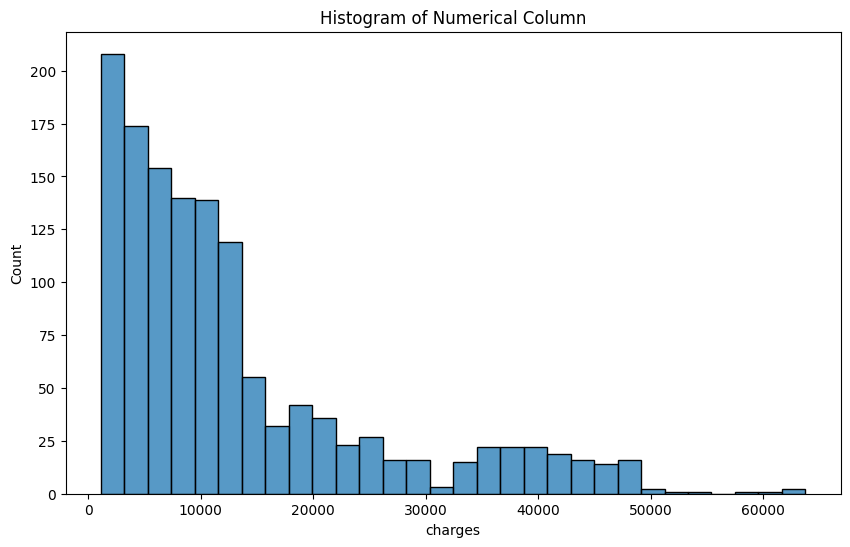

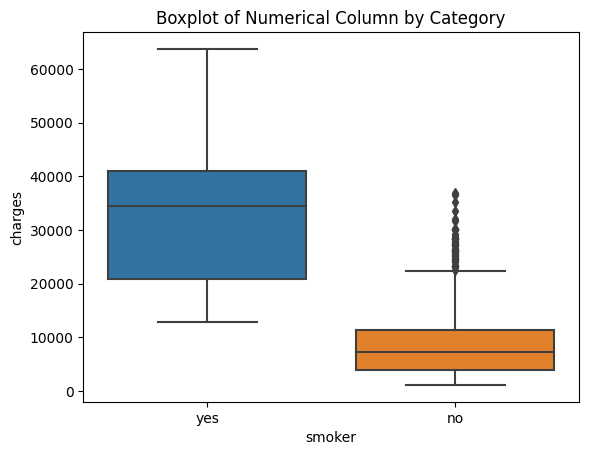

In [8]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges')
plt.title('Histogram of Numerical Column')
plt.show()

sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Boxplot of Numerical Column by Category')
plt.show()


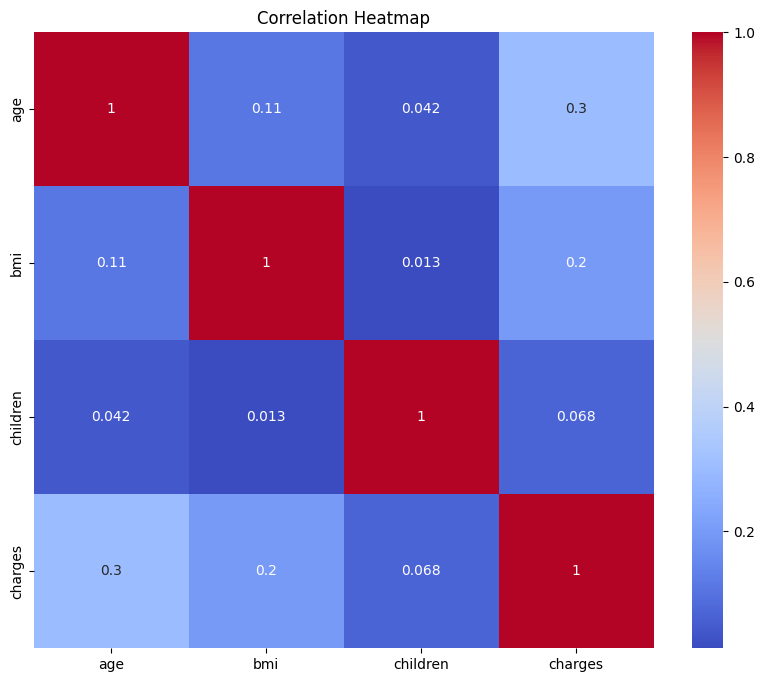

In [9]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
#Change the Categorical data using ordinal encoding
df.loc[df['smoker'] == 'yes','smoker'] = 1
df.loc[df['smoker'] == 'no','smoker'] = 0
df['smoker'] = (df['smoker']).astype(int)

#Change the Categorical data using one hot encoding
df['male'] = 0
df['female'] = 0
df.loc[df['sex'] == 'male','male'] = 1
df.loc[df['sex'] == 'female','female'] = 1

df['southwest'] = 0
df['southeast'] = 0
df['northwest'] = 0
df['northeast'] = 0
df.loc[df['region'] == 'southwest','southwest'] = 1
df.loc[df['region'] == 'southeast','southeast'] = 1
df.loc[df['region'] == 'northwest','northwest'] = 1
df.loc[df['region'] == 'northeast','northeast'] = 1

In [11]:
df = df.drop(columns=['sex','region'])

In [12]:
df

,age,bmi,children,smoker,charges,male,female,southwest,southeast,northwest,northeast
0,19,27.900,0,1,16884.92400,0,1,1,0,0,0
1,18,33.770,1,0,1725.55230,1,0,0,1,0,0
2,28,33.000,3,0,4449.46200,1,0,0,1,0,0
3,33,22.705,0,0,21984.47061,1,0,0,0,1,0
4,32,28.880,0,0,3866.85520,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,0,0,0,1,0
1334,18,31.920,0,0,2205.98080,0,1,0,0,0,1
1335,18,36.850,0,0,1629.83350,0,1,0,1,0,0
1336,21,25.800,0,0,2007.94500,0,1,1,0,0,0


In [13]:

def detect_outliers(df, threshold=3):
    outliers = []
    

    for column in df.columns:
        mean = np.mean(df[column])
        std = np.std(df[column])
        
        for value in df[column]:
            z_score = (value - mean) / std
            if np.abs(z_score) > threshold:
                outliers.append(value)
    
    return outliers


In [14]:
df.dtypes

age            int64
bmi          float64
children       int64
smoker         int32
charges      float64
male           int64
female         int64
southwest      int64
southeast      int64
northwest      int64
northeast      int64
dtype: object

In [15]:
#standardization

X = df.drop(columns=['charges'])   
X = (X - X.mean()) / X.std()  
Y = df['charges']
Y = Y.ravel()


# normalization  
normalized_dataset = (X - np.min(X)) / (np.max(X) - np.min(X))

print(normalized_dataset)


           age       bmi  children  smoker  male  female  southwest  \
0     0.021739  0.321227       0.0     1.0   0.0     1.0        1.0   
1     0.000000  0.479150       0.2     0.0   1.0     0.0        0.0   
2     0.217391  0.458434       0.6     0.0   1.0     0.0        0.0   
3     0.326087  0.181464       0.0     0.0   1.0     0.0        0.0   
4     0.304348  0.347592       0.0     0.0   1.0     0.0        0.0   
...        ...       ...       ...     ...   ...     ...        ...   
1333  0.695652  0.403820       0.6     0.0   1.0     0.0        0.0   
1334  0.000000  0.429379       0.0     0.0   0.0     1.0        0.0   
1335  0.000000  0.562012       0.0     0.0   0.0     1.0        0.0   
1336  0.065217  0.264730       0.0     0.0   0.0     1.0        1.0   
1337  0.934783  0.352704       0.0     1.0   0.0     1.0        0.0   

      southeast  northwest  northeast  
0           0.0        0.0        0.0  
1           1.0        0.0        0.0  
2           1.0        0.0 

In [16]:
X

,age,bmi,children,smoker,male,female,southwest,southeast,northwest,northeast
0,-1.438227,-0.453151,-0.908274,1.969850,-1.010141,1.010141,1.764821,-0.611095,-0.566206,-0.565056
1,-1.509401,0.509431,-0.078738,-0.507273,0.989221,-0.989221,-0.566206,1.635183,-0.566206,-0.565056
2,-0.797655,0.383164,1.580335,-0.507273,0.989221,-0.989221,-0.566206,1.635183,-0.566206,-0.565056
3,-0.441782,-1.305043,-0.908274,-0.507273,0.989221,-0.989221,-0.566206,-0.611095,1.764821,-0.565056
4,-0.512957,-0.292447,-0.908274,-0.507273,0.989221,-0.989221,-0.566206,-0.611095,1.764821,-0.565056
...,...,...,...,...,...,...,...,...,...,...
1333,0.768185,0.050278,1.580335,-0.507273,0.989221,-0.989221,-0.566206,-0.611095,1.764821,-0.565056
1334,-1.509401,0.206062,-0.908274,-0.507273,-1.010141,1.010141,-0.566206,-0.611095,-0.566206,1.768415
1335,-1.509401,1.014499,-0.908274,-0.507273,-1.010141,1.010141,-0.566206,1.635183,-0.566206,-0.565056
1336,-1.295877,-0.797515,-0.908274,-0.507273,-1.010141,1.010141,1.764821,-0.611095,-0.566206,-0.565056


In [17]:
outliers = detect_outliers(X)
outliers

[3.0167332365265787,
 3.2331910163745508,
 3.5939539827878364,
 3.684144724391159,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003,
 3.2394074915487003]

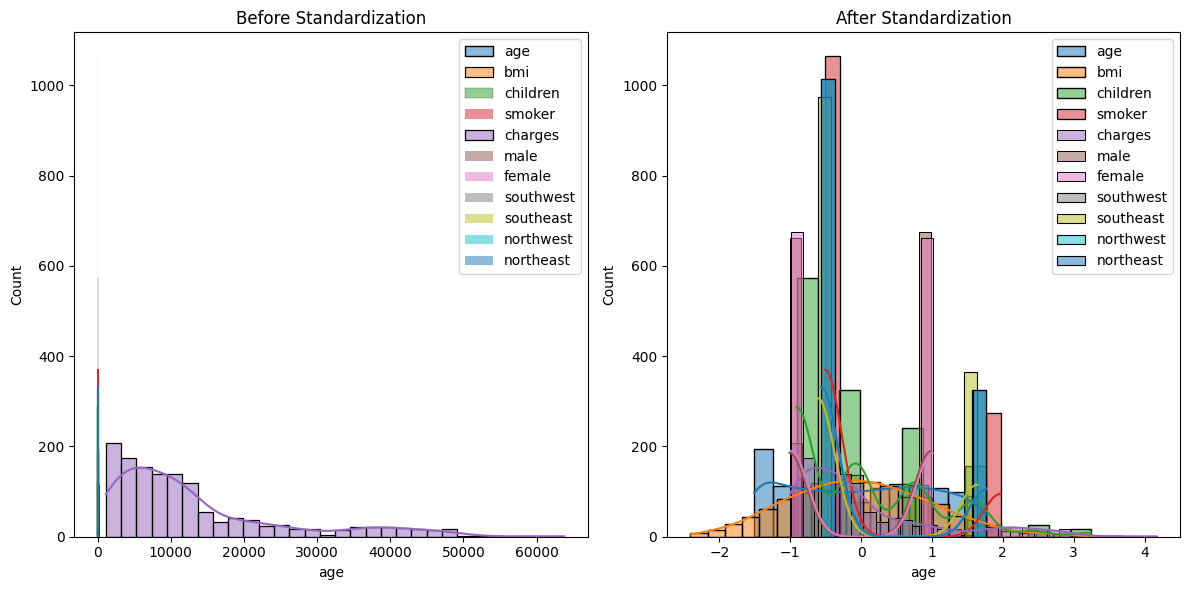

In [18]:

from sklearn.preprocessing import StandardScaler


# Plot the DataFrame before standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Before Standardization')
for column in df.columns:
    sns.histplot(df[column], kde=True, label=column)
plt.legend()

# Standardize the DataFrame
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot the DataFrame after standardization
plt.subplot(1, 2, 2)
plt.title('After Standardization')
for column in df_standardized.columns:
    sns.histplot(df_standardized[column], kde=True, label=column)
plt.legend()

plt.tight_layout()
plt.show()


In [19]:

quantiles = df.quantile([0.25, 0.75])

# Access the 25th and 75th percentiles for each column
quantile1 = quantiles.loc[0.25]
quantile3 = quantiles.loc[0.75]


In [20]:
print(quantile1,quantile3)

age            27.00000
bmi            26.29625
children        0.00000
smoker          0.00000
charges      4740.28715
male            0.00000
female          0.00000
southwest       0.00000
southeast       0.00000
northwest       0.00000
northeast       0.00000
Name: 0.25, dtype: float64 age             51.000000
bmi             34.693750
children         2.000000
smoker           0.000000
charges      16639.912515
male             1.000000
female           1.000000
southwest        0.000000
southeast        1.000000
northwest        0.000000
northeast        0.000000
Name: 0.75, dtype: float64


In [21]:
# Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

age             24.000000
bmi              8.397500
children         2.000000
smoker           0.000000
charges      11899.625365
male             1.000000
female           1.000000
southwest        0.000000
southeast        1.000000
northwest        0.000000
northeast        0.000000
dtype: float64


In [22]:
# Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

In [23]:
print(lower_bound_val,upper_bound_val)

age             -9.000000
bmi             13.700000
children        -3.000000
smoker           0.000000
charges     -13109.150897
male            -1.500000
female          -1.500000
southwest        0.000000
southeast       -1.500000
northwest        0.000000
northeast        0.000000
dtype: float64 age             87.000000
bmi             47.290000
children         5.000000
smoker           0.000000
charges      34489.350562
male             2.500000
female           2.500000
southwest        0.000000
southeast        2.500000
northwest        0.000000
northeast        0.000000
dtype: float64


In [24]:
X = np.column_stack((np.ones(X.shape[0]), X))

In [25]:
X

array([[ 1.        , -1.4382265 , -0.45315057, ..., -0.61109518,
        -0.56620618, -0.56505559],
       [ 1.        , -1.50940108,  0.50943062, ...,  1.63518326,
        -0.56620618, -0.56505559],
       [ 1.        , -0.7976553 ,  0.38316358, ...,  1.63518326,
        -0.56620618, -0.56505559],
       ...,
       [ 1.        , -1.50940108,  1.01449877, ...,  1.63518326,
        -0.56620618, -0.56505559],
       [ 1.        , -1.29587735, -0.79751522, ..., -0.61109518,
        -0.56620618, -0.56505559],
       [ 1.        ,  1.55110577, -0.26129026, ..., -0.61109518,
         1.76482111, -0.56505559]])

LR model from scratch

In [26]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
x_train_val, x_test = X[:split_index], X[split_index:]
y_train_val , y_test = Y[:split_index], Y[split_index:]


In [27]:
x_train, x_val = x_train_val[:split_index], x_train_val[split_index:]
y_train , y_val = y_train_val[:split_index], y_train_val[split_index:]

In [28]:
x_test.shape

(268, 11)

In [29]:
class My_LinearRegression:
    def __init__(self):
        self.weights = None  # Model parameters
        self.bias = None
        self.cost = None

    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        m, n = X.shape
        self.weights = np.zeros(n) 
        self.bias = 0
        self.cost = np.zeros(num_iterations)

        for i in range(num_iterations):
            
            # Calculate predictions
            y_pred = np.dot(X, self.weights) + self.bias
            # Calculate cost
            self.cost[i] = (0.5 * (np.sum(y_pred - y)**2) )/ m

            # Compute gradients
            g_weights = (1 / m) * np.dot(X.T, (y_pred - y))
            g_bias = (1 / m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= learning_rate * g_weights
            self.bias -= learning_rate * g_bias
        # Calculate cost at the final solutin
        self.cost[-1] = 0.5 * (np.sum(y_pred - y)**2) / m

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def cost_function(self):
        return self.cost


In [30]:
# Create the linear regression model
LR_model = My_LinearRegression()

In [31]:
# Vary the number of iterations and learning rates for the plots
num_iterations_list = [200, 500, 1000, 3500]
learning_rates = [0.01, 0.05, 0.1, 0.5]


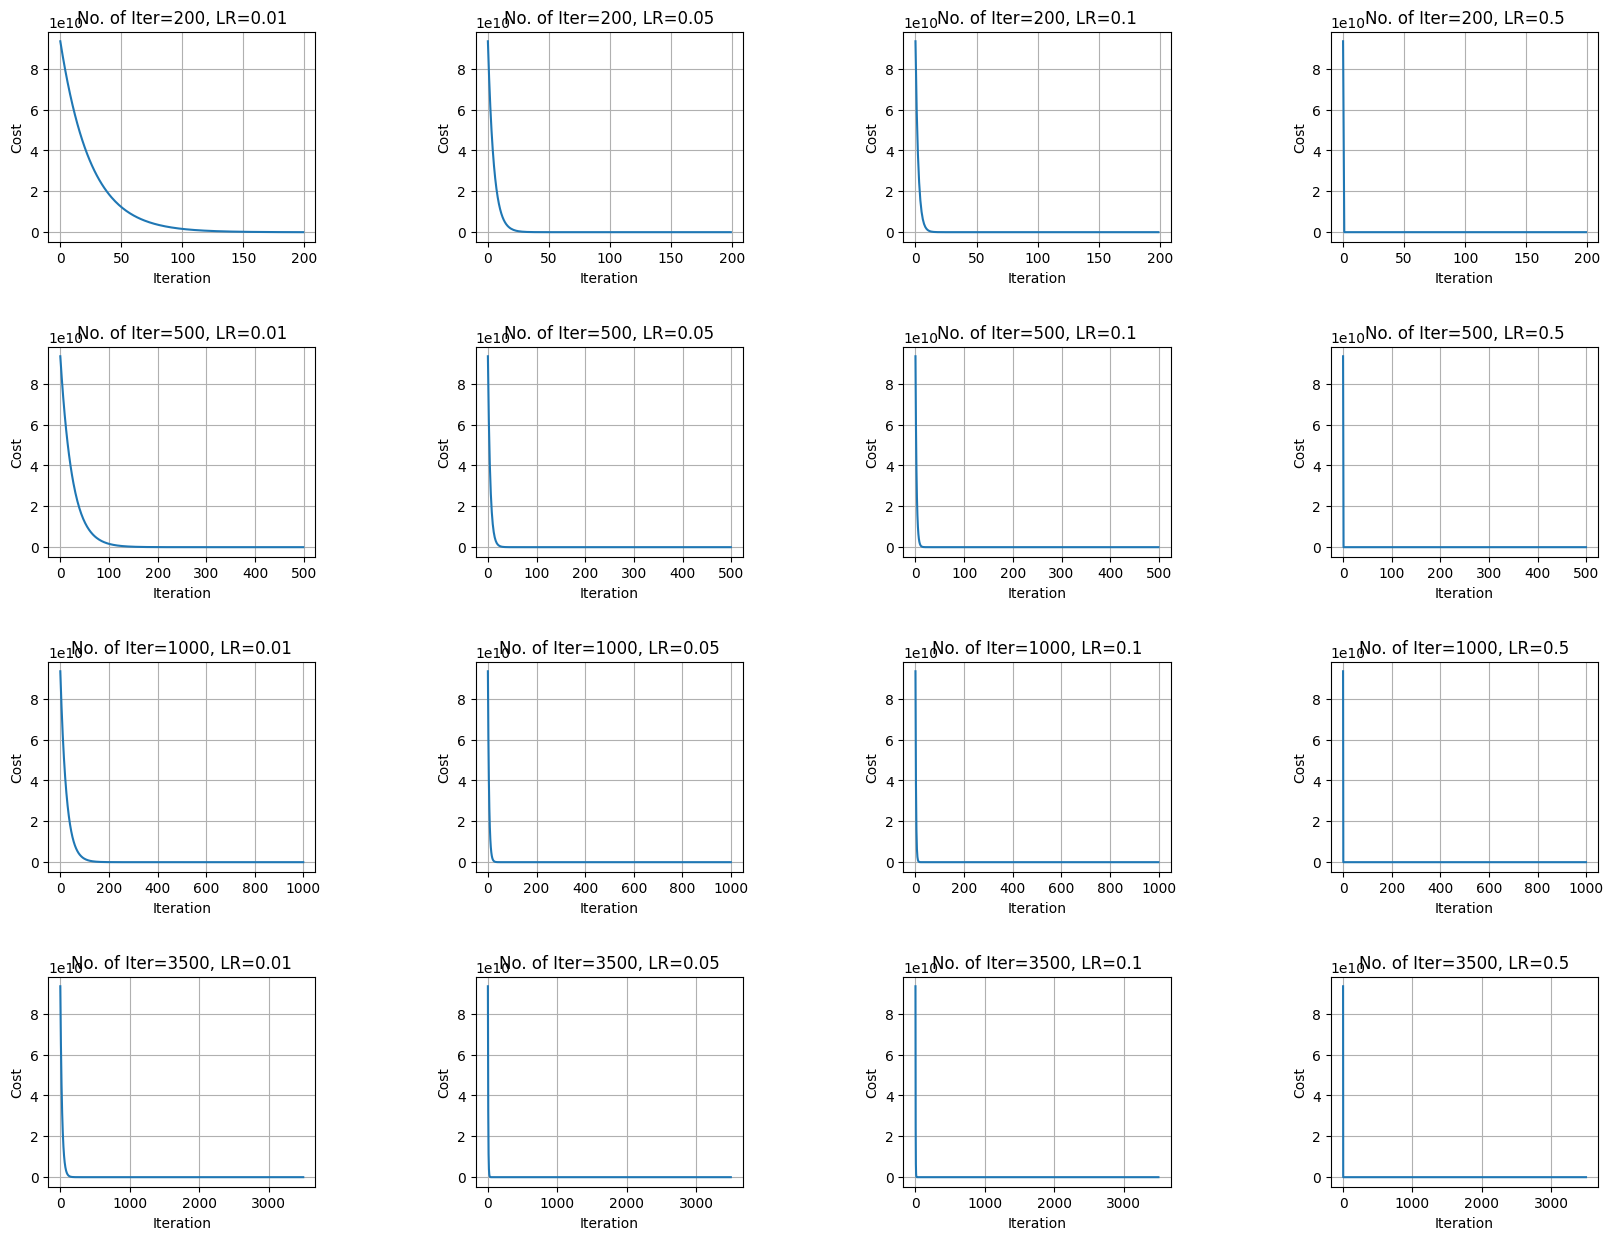

In [32]:
# Create a grid of subplots
fig, axes = plt.subplots(len(num_iterations_list), len(learning_rates), figsize=(20, 15))
plt.subplots_adjust(wspace=0.6, hspace=0.5)
# Iterate through different combinations of number of iterations and learning rates
for i, num_iterations in enumerate(num_iterations_list):
    for j, learning_rate in enumerate(learning_rates):
        # Train the model
        LR_model.fit(x_train, y_train,learning_rate,num_iterations)
        

        # Plot the cost function
        axes[i, j].plot(range(num_iterations), LR_model.cost_function())
        axes[i, j].set_title(f"No. of Iter={num_iterations}, LR={learning_rate}")
        axes[i, j].set_xlabel("Iteration")
        axes[i, j].set_ylabel("Cost")
        axes[i, j].grid(True)
        
        

# Display the plots
plt.show()

In [33]:
# Test the model
prediction = LR_model.predict(x_test)

R-squared (R²) Score: 0.7584847182677396
Mean Squared Error (MSE): 37175951.405714944



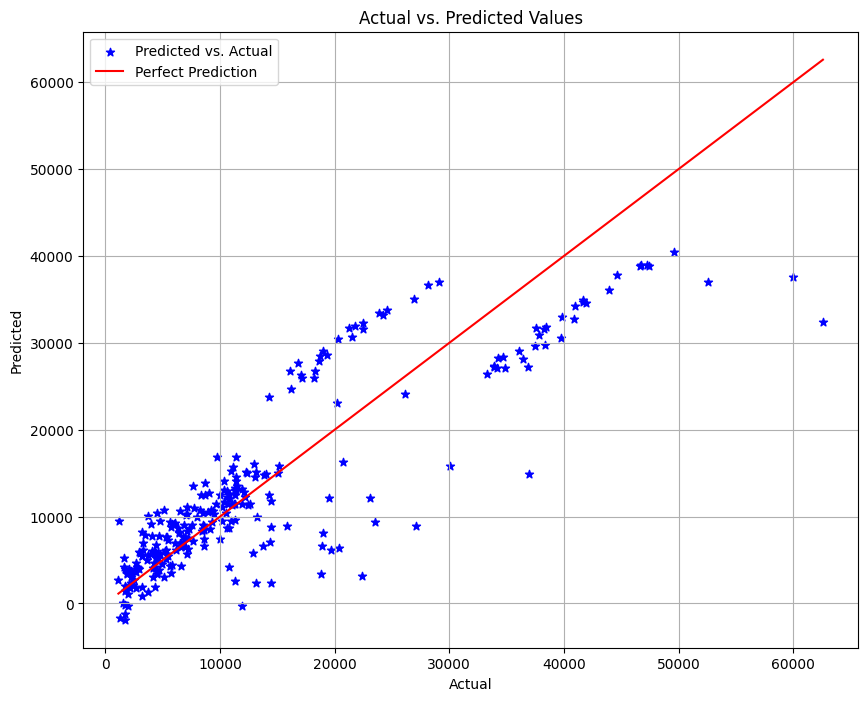

In [34]:
# Evaluate the model
mse = np.mean((y_test - prediction) ** 2)
r2 = 1 - (mse / np.var(y_test))
print(f"R-squared (R²) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}\n")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, prediction,c='b', marker='*', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Perfect Prediction')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
        

plt.show()


LR model using scikit-learn library

In [35]:
# LR model using scikit-learn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
# Split the data into training and testing sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2, random_state=40)

In [37]:
# Created a linear regression model and train the
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

LinearRegression()

In [38]:
# Test the model
prediction_2 = model_LR.predict(X_test)

R-squared (R²) Score: 0.7331278921234236
Mean Squared Error (MSE): 39895933.90249628



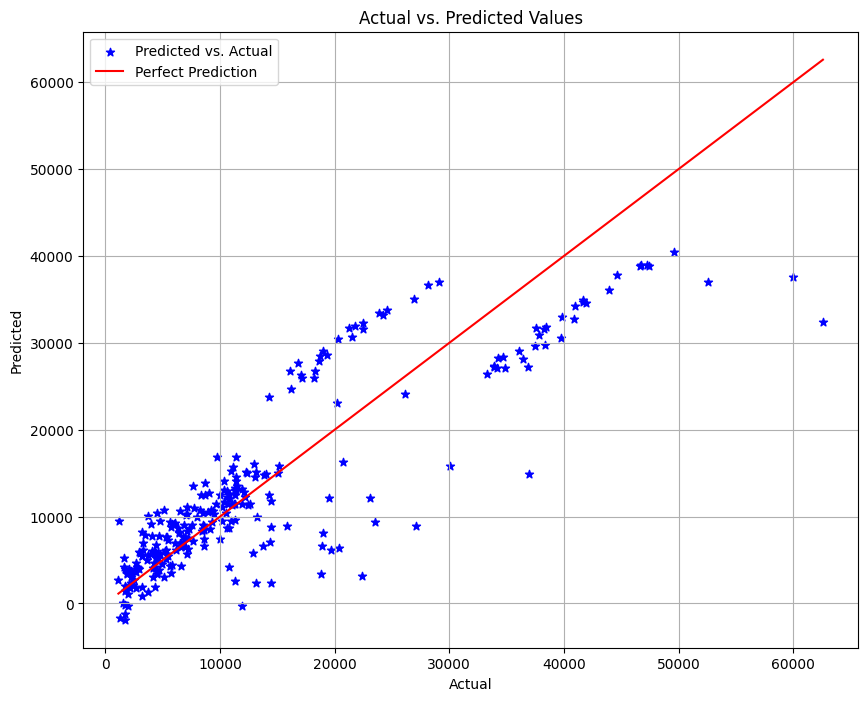

In [39]:
# Evaluate the model
mes_2 = mean_squared_error(Y_test, prediction_2)
r2_2 = r2_score(Y_test, prediction_2)
print(f"R-squared (R²) Score: {r2_2}")
print(f"Mean Squared Error (MSE): {mes_2}\n")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, prediction,c='b', marker='*', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Perfect Prediction')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
        

plt.show()